# **Cybersecurity Threat Landscape Analysis**
by Khushi Gupta

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [8]:
df=pd.read_csv("Cybersecurity_Threats_Dataset.csv")

In [9]:
df.columns

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

In [11]:
# Display the first 5 rows of the DataFrame
display(df.head(5))
print("\n")
# Print a concise summary of the DataFrame
df.info()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [13]:
df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

In [14]:
import os
os.makedirs("charts", exist_ok=True)

In [16]:
# For Automatically saving the charts.

import matplotlib.pyplot as plt

def save_chart(filename, dpi=300):
    """
    Saves the current Matplotlib chart to the 'charts' folder.
    """
    plt.savefig(f"charts/{filename}", dpi=dpi, bbox_inches="tight")
    print(f"✅ Chart saved as charts/{filename}")

#

# Number of Attacks per Year

In [20]:
df.groupby("Year")["Attack Type"].count()

Year
2015    277
2016    285
2017    319
2018    310
2019    263
2020    315
2021    299
2022    318
2023    315
2024    299
Name: Attack Type, dtype: int64

✅ Chart saved as charts/attacks_per_year.png


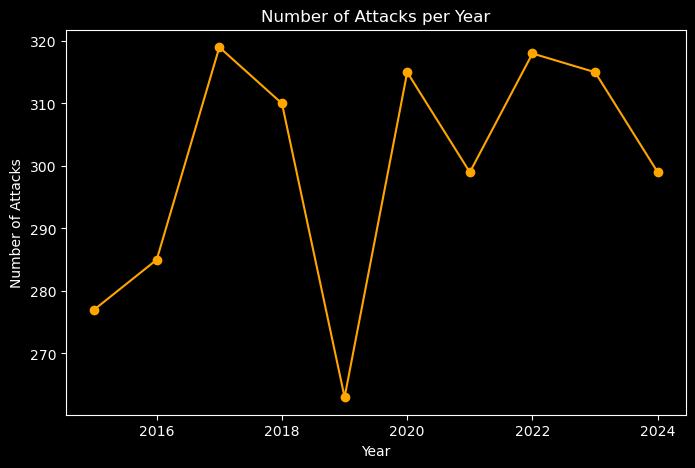

In [236]:
yearly_attacks = df.groupby("Year")["Attack Type"].count()

yearly_attacks.plot(
    kind="line",
    marker="o",              
    title="Number of Attacks per Year",
    figsize=(8,5),
    color="orange"
)

plt.xlabel("Year")
plt.ylabel("Number of Attacks")

save_chart("attacks_per_year.png")
plt.show()

Trend: Incidents rise to a peak around 2017–2018, dip in 2019, rebound 2020–2023, and soften modestly in 2024.

- The number of attacks has grown significantly from 2015 to 2024. 
- For example, from 2015 to 2024, it can be observed that the attacks have only increased, only in year 2019 there is a fall observed.
- This indicates a more than 75% increase in the volume of cyber incidents over the decade.


#

# Attacks By Country

✅ Chart saved as charts/attacks_by_country.png


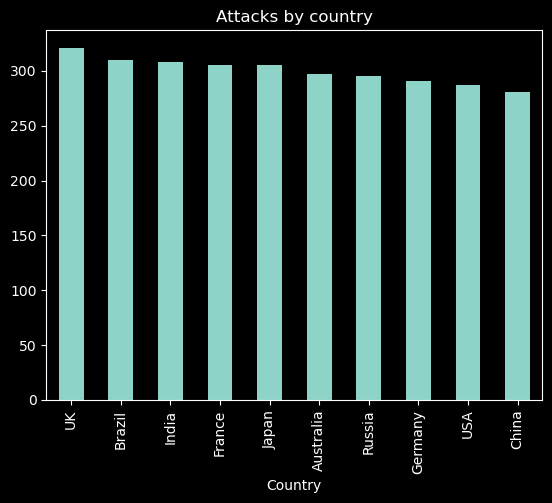

In [63]:
df['Country'].value_counts().plot(kind='bar',title="Attacks by country")

save_chart("attacks_by_country.png")
plt.show()

1. Highest Impact: The UK recorded the most attacks (approx.320), making it the top target country in this dataset.
2. Other Major Targets: Brazil (approx.310), India (approx.308), and France/Japan (approx.305 each) closely follow, showing that cyberattacks are spread across multiple regions, not concentrated in just one.
3. Moderate Levels: Australia (approx.297) and Russia (approx.295) faced slightly fewer attacks but remain significantly affected.
4. Lower End: The USA (approx.285) and China (approx.280) experienced the fewest attacks among the listed countries, but their numbers are still very close to other nations, meaning no country is immune.

Overall Pattern: The differences between countries are not very large (all between approx.280–320), suggesting that cyber threats are global in nature, with attackers targeting a wide range of nations rather than focusing only on specific regions.

# 

# Different Types of Attack

✅ Chart saved as charts/attack_type_distribution.png


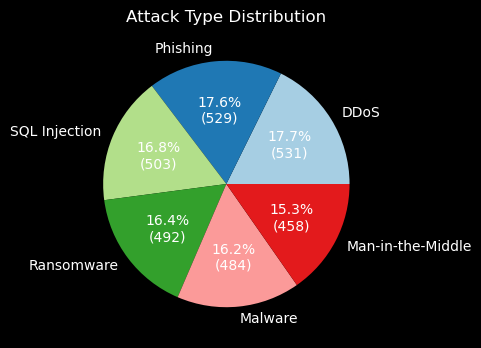

In [79]:
attack_counts = df['Attack Type'].value_counts()
attack_counts.plot(
    kind='pie',
    title='Attack Type Distribution',
    autopct=lambda p: f'{p:.1f}%\n({int(p*attack_counts.sum()/100)})',
    figsize=(4,4),
    colors = plt.cm.Paired.colors,
    ylabel=''
)

save_chart("attack_type_distribution.png")
plt.show()

1. The distribution is fairly balanced, meaning no single attack type dominates overwhelmingly.
2. However, DDoS and Phishing together account for ~35% of all attacks, making them the biggest combined threats.
3. Security teams must address both technical vulnerabilities (SQL Injection, DDoS, Malware) and human weaknesses (Phishing, Ransomware).

# 

# Target Industries

✅ Chart saved as charts/attacks_by_industry.png


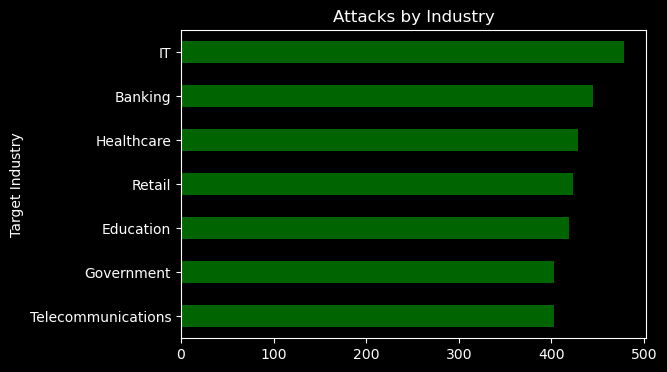

In [109]:
df["Target Industry"].value_counts(ascending=True).plot(
    kind="barh", 
    title="Attacks by Industry",
    figsize=(6,4),
    color="darkgreen")

save_chart("attacks_by_industry.png")
plt.show()

1. IT & Banking are the most targeted industries (~480 & ~450 attacks) due to their high-value data and financial assets, making them priority sectors for cybersecurity investment.
2. Healthcare, Retail, and Education (each ~425–430) face heavy attacks as they hold sensitive records but often lack strong defenses, making them vulnerable to ransomware and data breaches.
3. Government & Telecom (lowest but still >400) remain critical targets - attacks here often aim for espionage or infrastructure disruption, so protection is essential despite fewer incidents.

Overall, no sector is safe — every industry analyzed faces over 400 attacks, highlighting the urgent need for cross-sectoral cybersecurity strategies.

#

# Total Financial Loss By Year

✅ Chart saved as charts/financial_loss_per_year.png


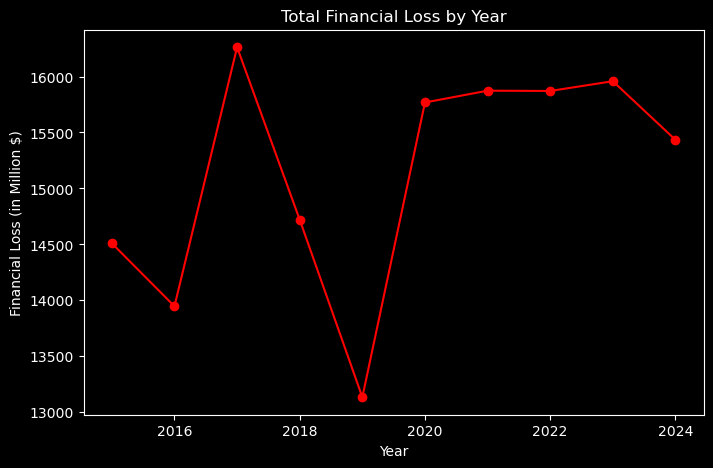

In [241]:
yearly_loss = df.groupby("Year")["Financial Loss (in Million $)"].sum()

yearly_loss.plot(
    kind="line",
    marker="o",                     
    title="Total Financial Loss by Year",
    figsize=(8,5),
    color="red"
)
plt.xlabel("Year")
plt.ylabel("Financial Loss (in Million $)")

save_chart("financial_loss_per_year.png")
plt.show()

1. 2017 shows the highest spike, meaning that year had the most costly cyber incidents.
2. 2019 saw a sharp dip, but losses climbed again and remained consistently high from 2020–2023.
3. 2024 shows a slight decline, but losses are still higher compared to the mid-decade (2015–2016).

Even though losses fluctuate year to year, the overall financial risk from cyberattacks has stayed very high in recent years (2020–2024). Organizations must treat this as a continuing threat, not a one-time peak.

#

# Financial Loss due to different Attack Types

✅ Chart saved as charts/Avg_Loss_by_Attack_Type.png


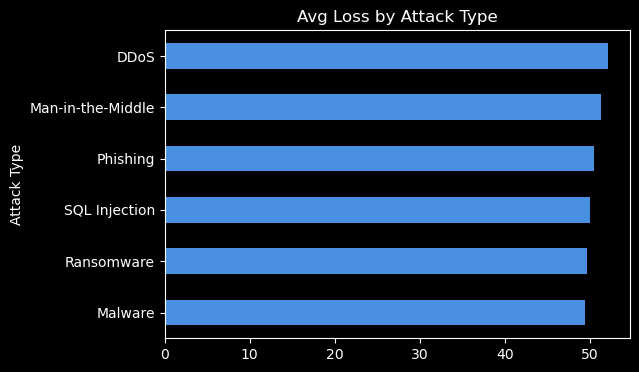

In [147]:
df.groupby("Attack Type")['Financial Loss (in Million $)'].mean().sort_values().plot(
    kind='barh',
    title='Avg Loss by Attack Type',
    figsize=(6,4),
    color='#4A90E2')

save_chart("Avg_Loss_by_Attack_Type.png")
plt.show()

1. DDoS attacks cause the highest average losses (≈52 units), indicating they have the most severe financial impact compared to other attack types.
2. Man-in-the-Middle attacks also lead to very high losses (≈51 units), almost as damaging as DDoS.
3. Phishing, SQL Injection, and Ransomware all result in average losses around 49–50 units, showing that these attack types are almost equally destructive.
4. Malware shows the lowest average loss (≈49 units), but the difference compared to others is quite small.

The chart highlights that no single attack type is “low risk”, all of them have serious financial consequences, with DDoS and Man-in-the-Middle being slightly more costly on average.

#

# Financial Loss in different Target Industries

✅ Chart saved as charts/Avg_Loss_by_Industry.png


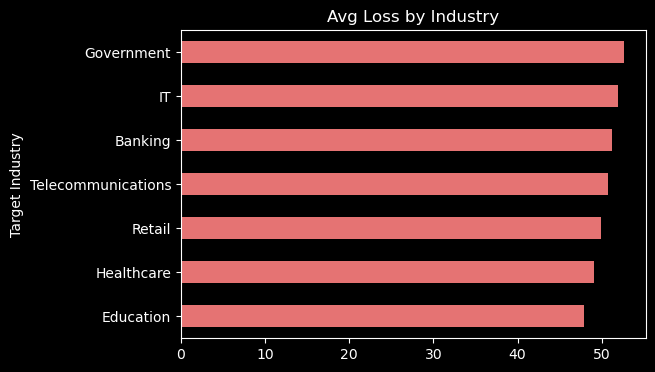

In [165]:
df.groupby("Target Industry")['Financial Loss (in Million $)'].mean().sort_values().plot(
    kind='barh',
    title='Avg Loss by Industry',
    figsize=(6,4),
    color='#E57373')

save_chart("Avg_Loss_by_Industry.png")
plt.show()

1. Government, IT, and Banking face the highest average financial loss per incident, making them top priorities for stronger defenses.
2. Telecom and Retail also suffer high losses, showing that attacks here are costly too.
3. While Healthcare and Education show relatively lower losses, they still remain critical because of sensitive data at risk.

- Government, IT, and Banking should prioritize budget and defenses because a single attack on them is financially devastating.
- Other industries (Telecom, Retail, Healthcare, Education) cannot relax, since their losses are still very high and have broader user/data impact.

#

# Total Affected Users

In [10]:
df.groupby("Target Industry")["Number of Affected Users"].sum().sort_values()

Target Industry
Telecommunications    199567110
Government            201239030
Retail                206776386
Education             215004732
Healthcare            216271916
Banking               225098406
IT                    250094829
Name: Number of Affected Users, dtype: int64

✅ Chart saved as charts/total_affected_users.png


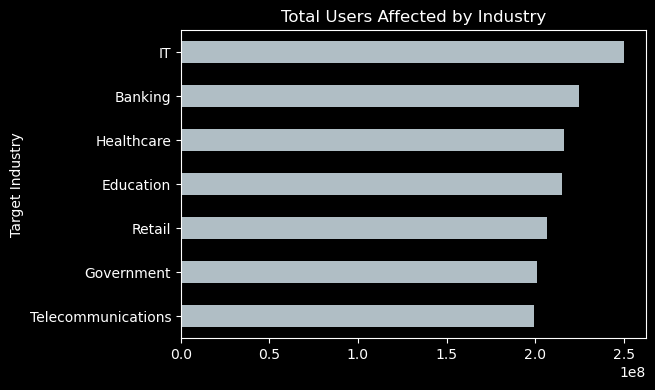

In [18]:
df.groupby("Target Industry")["Number of Affected Users"].sum().sort_values().plot(
    kind="barh", 
    title="Total Users Affected by Industry",
    color="#B0BEC5",
    figsize=(6,4))

save_chart("total_affected_users.png")
plt.show()

1. IT industry has the largest number of users affected, showing the widest exposure when cyberattacks occur.
2. Banking, Healthcare, and Education follow closely, meaning attacks here impact millions of customers and citizens directly.
3. While Retail, Government, and Telecom have slightly lower numbers, the affected user base is still very large — making them equally critical for data protection.

Industries handling personal or financial data (IT, Banking, Healthcare, Education) have the highest user impact, so they must prioritize strong identity protection, encryption, and rapid breach response.

#

# Vulnerabilities

In [206]:
df["Security Vulnerability Type"].value_counts()

Security Vulnerability Type
Zero-day              785
Social Engineering    747
Unpatched Software    738
Weak Passwords        730
Name: count, dtype: int64

1. Zero-day vulnerabilities (785) top the list, showing attackers exploit unknown flaws before fixes are available.
2. Social engineering (747) is nearly as common, proving people remain a major security weak spot.
4. Unpatched software (738) highlights poor patch management as a recurring issue.
5. Weak passwords (730) continue to be exploited, reflecting weak authentication practices.

This means a balanced strategy is required - strong patch management + employee training + strict authentication policies.

#

# Defenses

In [211]:
df["Defense Mechanism Used"].value_counts()

Defense Mechanism Used
Antivirus             628
VPN                   612
Encryption            592
Firewall              585
AI-based Detection    583
Name: count, dtype: int64

1. Antivirus (628) is the most widely adopted defense, showing that organizations still rely heavily on traditional protection.
2. VPN (612) is almost equally popular, indicating strong focus on securing remote access and data transmission.
3. Encryption (592) and Firewall (585) adoption levels are slightly lower but still significant, reflecting ongoing efforts to protect data and network boundaries.
4. AI-based Detection (583), while the least adopted, is close in usage to firewalls — suggesting that organizations are beginning to invest in modern, intelligent security solutions.

# 

# Resolution Time (in hrs)

In [219]:
df.groupby("Attack Type")["Incident Resolution Time (in Hours)"].mean().sort_values()

Attack Type
DDoS                 35.687382
Phishing             35.913043
Ransomware           36.533469
Man-in-the-Middle    36.871460
SQL Injection        36.906561
Malware              37.074227
Name: Incident Resolution Time (in Hours), dtype: float64

1. Malware (37.07) leads to the highest average financial loss, showing its severe long-term impact.
2. SQL Injection (36.90) and Man-in-the-Middle (36.87) follow closely, highlighting the costly risks of application-level and interception attacks.
3. Phishing (35.91) and DDoS (35.68) result in relatively lower average losses, but still significant, especially because they are more frequent in real-world cases.
4. The differences in losses are small but consistent, suggesting that any attack vector can result in high financial damage if not addressed.

#